# Offline evaluation for single CASTLE NN

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
import sys
import os

# 0 = all messages are logged (default behavior)
# 1 = INFO messages are not printed
# 2 = INFO and WARNING messages are not printed
# 3 = INFO, WARNING, and ERROR messages are not printe
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1' 

In [4]:
module_path = os.path.abspath(os.path.join('..'))
# Relative imports
if module_path not in sys.path:
    sys.path.append(module_path)

In [5]:
import tensorflow as tf

print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [6]:
from utils.setup import SetupDiagnostics
from neural_networks.load_models import load_single_model, get_save_plot_folder
from neural_networks.model_diagnostics import ModelDiagnostics
from utils.variable import Variable_Lev_Metadata
from pathlib import Path

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


## Load model and get ModelDescription

In [7]:
argv = ["-c", "../output_castle/training_23_custom_mirrored_sparsity/cfg_mirrored.yml"]
plot_dir = Path("../output_castle/training_23_custom_mirrored_sparsity/plots_offline_evaluation/single_plots/")

In [8]:
var_name = "prect" # tphystnd-524.69, prect, fsnt

In [9]:
def get_model_desc(argv, variable):
    setup = SetupDiagnostics(argv)
        
    var_model = load_single_model(setup, variable)
    
    setup.model_type = setup.nn_type
    return ModelDiagnostics(setup=setup, models=var_model)


In [10]:
md = get_model_desc(argv, var_name)



Load model: /work/bd1179/b309247/pycharm_projects/iglesias-suarez2yxx_spuriouslinks/output_castle/training_23_custom_mirrored_sparsity/models_castle_mirrored/castleNN/r1.0-a1.0-b1.0-l1.0-mirrored/hl_256_256_256_256_256_256_256_256_256-act_ReLU-e_20/6_0_model.keras


## Evaluation plots

### Lat-lon

In [11]:
import matplotlib.pyplot as plt

In [12]:
var = Variable_Lev_Metadata.parse_var_name(var_name)

In [23]:
# Parameters
i_time = 1  # 'mean', 'range' --> range doesn't work
n_time = 1440  # about a month
n_samples = 1024  # 1024; 2048; 4096; 8192

# Additional params for setting plot color map range
vmin = False  # False, -3e-7
vmax = False  # False, 3e-7


Plotting double_xy for variable prect

Test batch size = 8192.
Saved plot prect_map_time-1-1440steps.png.


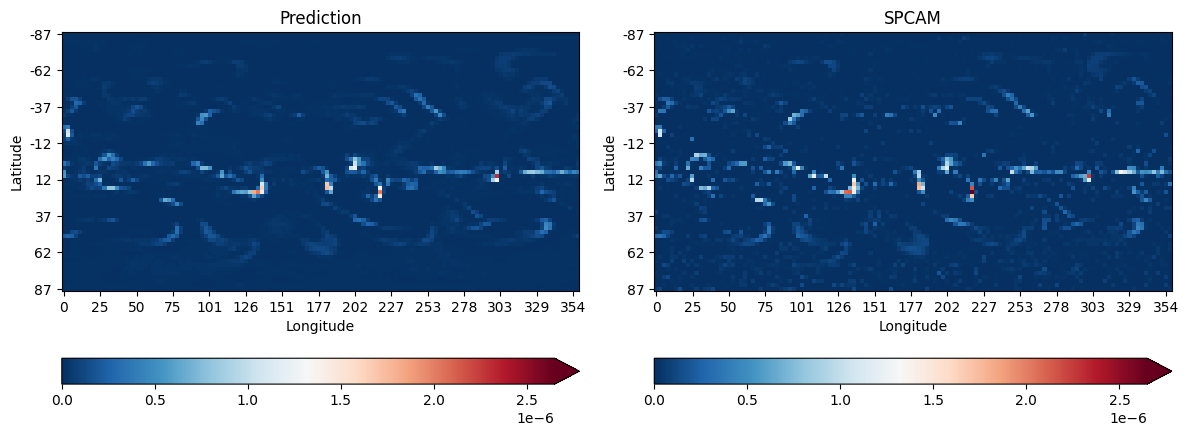

In [24]:
fig, axes = md.plot_double_xy(i_time, var, diff=False, nTime=n_time, cmap="RdBu_r", show_plot=True, save=plot_dir)



Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-1-1440steps_stats.png.


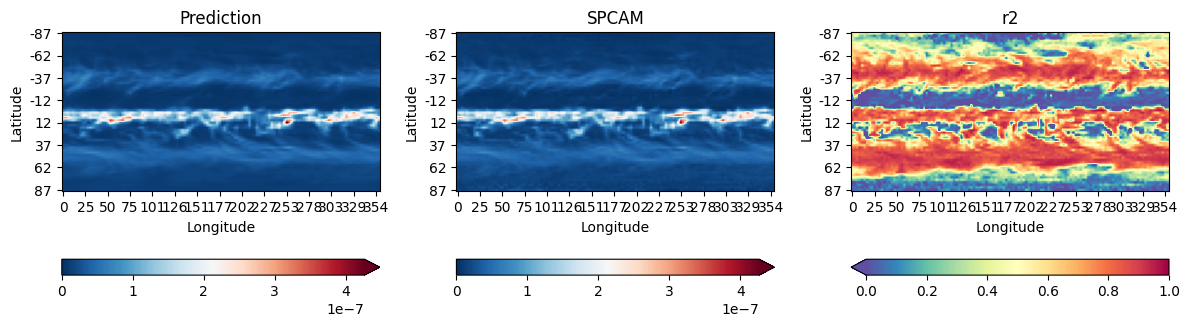

In [27]:
fig, axes = md.plot_double_xy(i_time, var, diff=False, nTime=n_time, stats='r2', cmap="RdBu_r", show_plot=True, save=plot_dir)



Plotting double_xy for variable prect

Test batch size = 8192.
Saved plot prect_map_time-1-1440steps_diff.png.


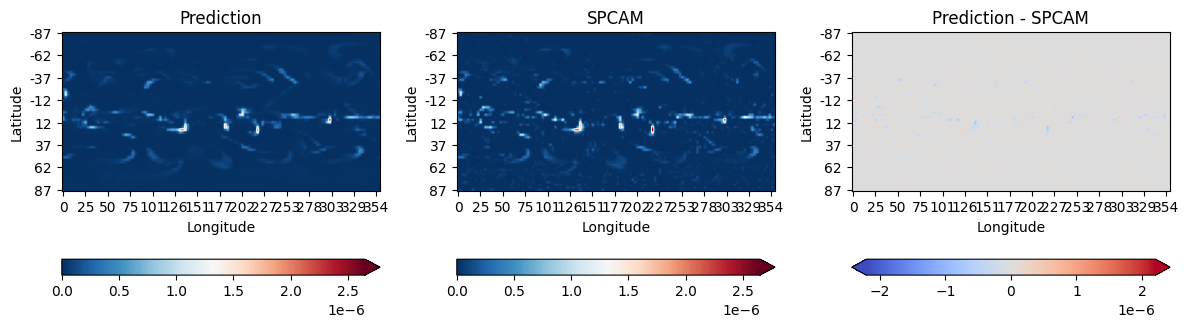

In [15]:
fig, axes = md.plot_double_xy(i_time, var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=True, save=plot_dir)


In [17]:
# Parameters
i_time = 'mean'  # 'mean', 'range' --> range doesn't work
n_time = 1440  # about a month
n_samples = 1024  # 1024; 2048; 4096; 8192
stats = 'r2'

# Additional params for setting plot color map range
vmin = False  # False, -3e-7
vmax = False  # False, 3e-7


Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-mean-1440steps.png.


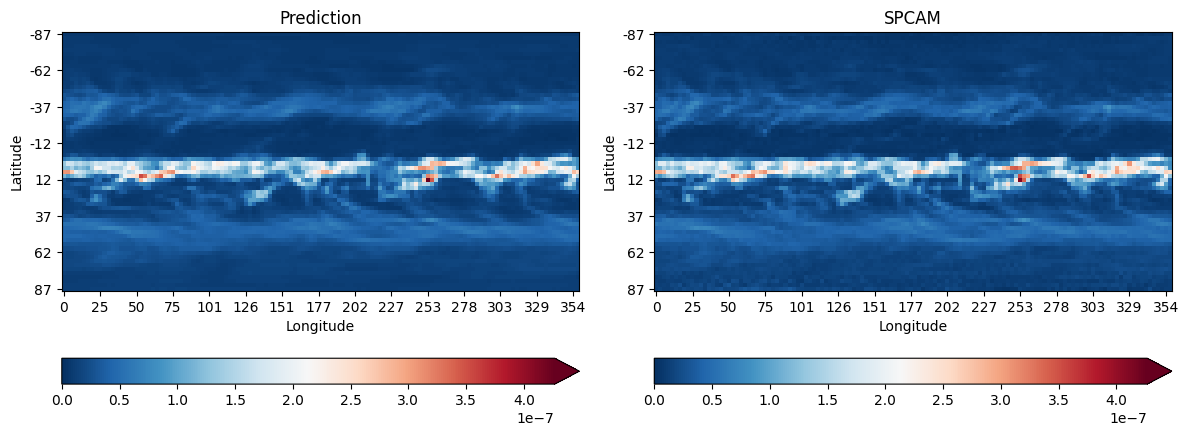

In [18]:
fig, axes = md.plot_double_xy(i_time, var, diff=False, nTime=n_time, cmap="RdBu_r", show_plot=True, save=plot_dir)


Plotting double_xy for variable prect

Test batch size = 8192.
Time samples: 1440
Saved plot prect_map_time-mean-1440steps_stats.png.


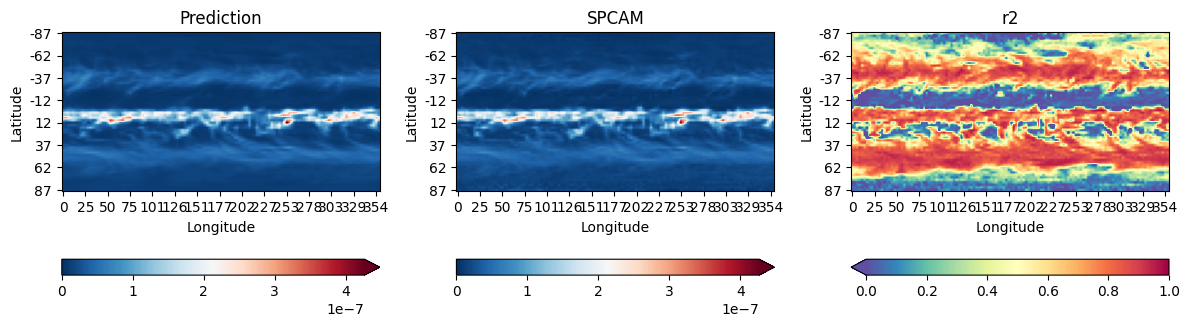

In [20]:
fig, axes = md.plot_double_xy(i_time, var, diff=False, nTime=n_time, stats=stats, cmap="RdBu_r", show_plot=True, save=plot_dir)

# Do not run!!!


Plotting double_xy for variable prect

Test batch size = 8192.


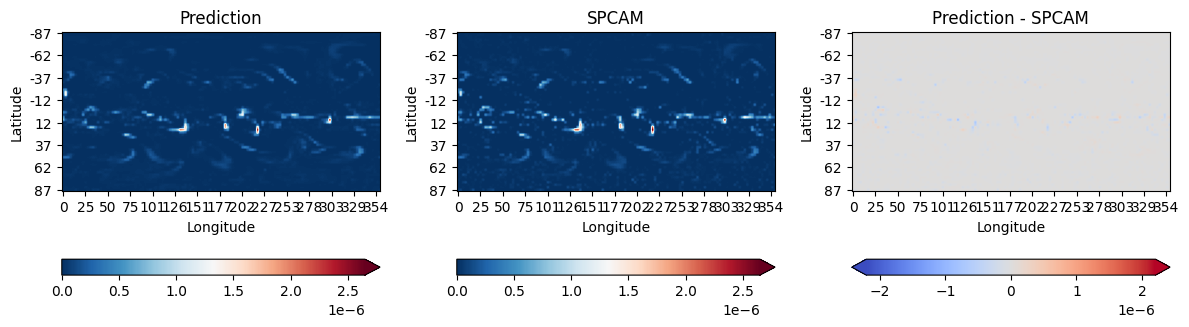

In [30]:
# training_7_mirrored_dict
fig, axes = model_desc.plot_double_xy(i_time, var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=True)


Plotting double_xy for variable prect

Test batch size = 8192.


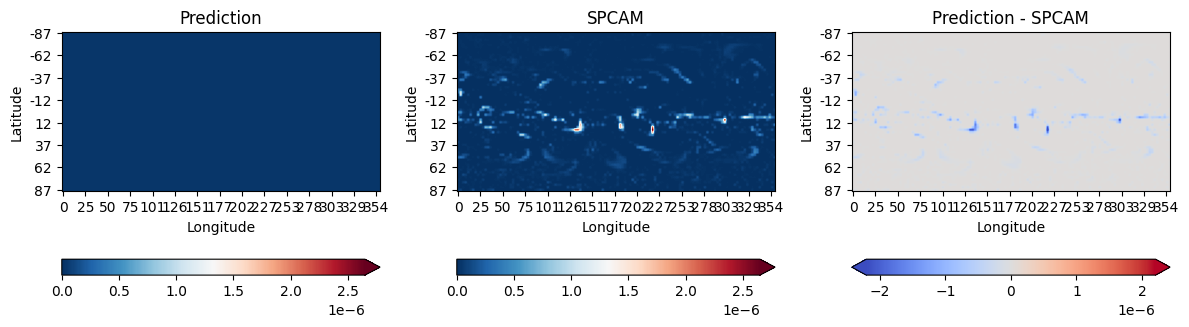

In [20]:
# training_9/training_10
fig, axes = model_desc.plot_double_xy(i_time, var, diff=True, nTime=n_time, cmap="RdBu_r", show_plot=True)